In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import itertools as it
import warnings; warnings.simplefilter('ignore')

In [2]:
def separation(data):
    '''Function for separation of certain data in the dataset.
       Function takes in a string and returns a
       list of elements of the string'''
    if '/' in data:
        data = data.split('/')
    return data

def coma_separation(data):
    '''Function for separation of certain data in the dataset.
       Function takes in a string and returns a
       list of elements of the string'''
    data = str(data)
    if ',' in data:
        data = data.split(', ')
    return data

In [3]:
data = pd.read_csv('Sexuality_in_video_games_unedited.csv')

In [4]:
'''Renaming the columns of the dataset, making it easier to refer to them later on'''
data.columns = ['date', 'Gender', 'Sexual_orientation', 
                'Age_group','Country','Regularity_of_gaming',
                'Session_length','Genre', 'Favourite_game','Other_interests',
               'View_on_sexuality','View_on_sexualisation','Design_preferences',
               'Design_issues','View_on_sexual_sub_context','bruh','LGBT_representation', 'extras']

In [56]:
'''The function below takes in an object from a dataset, country name.
It compares it with 9 lists, returning an edited name of the country.
If the country name is in none of those lists, it compares it with
another list, returning the name of the country if it is in that list.
Otherwise, it replaces the country name with the word "Other"
and returns it.'''
def country_sort(Country):
    Country = str(Country)
    if Country.lower() in ['usa', 'united states ', 'murica', 
                           'america', 'usa ', 'us', 'united states',
                           'united states of america', 'u.s.']:
        Country = 'USA'    
    elif Country.lower() in ['uk', 'uk ', 'united kingdom',
                           'england', 'scotland', 'united kingdom ',
                           'england ']:
        Country = 'UK'
    elif Country.lower() in ['netherlands', 'the netherlands', 'netherlands ', 
                           'the netherlands ']:
        Country = 'The Netherlands'
    elif Country.lower() in ['canada', 'canada ']:
        Country = 'Canada'
    elif Country.lower() in ['france', 'france ']:
        Country = 'France'
    elif Country.lower() in ['russia', 'russian federation']:
        Country = 'Russia'
    elif Country.lower() in ['australia', 'new zealand', 'new zeland']:
        Country = 'Australia and New Zealand'
    elif Country.lower() in ['méxico', 'mexico']:
        Country = 'Mexico'
    elif Country.lower() in ['germany', 'germany ']:
        Country = 'Germany'
    elif Country in ['USA', 'UK', 'Germany', 'Canada',
                   'Australia and New Zealand', 'France',
                   'Brazil', 'Russia', 'Poland',
                   'The Netherlands', 'Latvia', 'Mexico']:
        next
    else:
        Country ='Other'
    return Country 

'''applying the functions'''
data.Country = data.Country.apply(country_sort)
data.Country.value_counts() #checking if the function work

USA                          112
Other                         36
UK                            20
Germany                       15
Canada                        13
Australia and New Zealand      9
France                         8
Brazil                         8
The Netherlands                6
Poland                         6
Russia                         6
Mexico                         4
Latvia                         4
Name: Country, dtype: int64

In [6]:
'''This block replaces wordy answers with numbers, scaling from 1 to 7, with 1 being
most negative view on the subject and 7 being the most positive view on the subject.
the last line replaces data dype frpm "object" to "int64"'''
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Neutral'] = 4
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Mostly positive'] = 6
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Sometimes positive'] = 5
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Absolutely positive'] = 7
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Mostly negative'] = 2
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Absolutely negative'] = 1
data['View_on_sexuality'].loc[data.View_on_sexuality == 'Sometimes negative'] = 3
data['View_on_sexuality'] = pd.to_numeric(data['View_on_sexuality'])

In [7]:
'''This block collects different unsorted Genre answers into prepeared categories'''
data['Genre'][data.Genre.str.contains("Don't")] = 'None'
data['Genre'][data.Genre.str.contains("I like")] = 'Action/Adventure/Singleplayer RPGs/Multiplayer RPGs/Strategy'
data['Genre'][data.Genre.str.contains("Sim")] = 'Simulators'
data['Genre'][data.Genre.str.contains("Rhythm")] = 'Action'
data['Genre'][data.Genre.str.contains("Sand")] = 'Simulators'
data['Genre'][data.Genre.str.contains('F')] = 'Action'
data['Genre'][data.Genre.str.contains('strategy')] = 'Strategy'
data['Genre'][data.Genre.str.contains('all of')] = 'Action/Adventure/Singleplayer RPGs/Multiplayer RPGs/Simulators/Strategy'
data['Genre'][data.Genre.str.contains('vague')] = 'None'
data['Genre'][data.Genre.str.contains('Survival')] = 'Simulators'
data['Genre'][data.Genre.str.contains('every')] = 'Action/Adventure/Singleplayer RPGs/Multiplayer RPGs/Simulators/Strategy'
data['Genre'][data.Genre.str.contains('Prefer')] = 'None'
data['Genre'][data.Genre.str.contains('band')] = 'None'
data['Genre'][data.Genre.str.contains('Co')] = 'None'

In [8]:
'''The string of genres is made into a list and separated for future statistical work'''
data['Genre'] = data['Genre'].apply(separation)
genres_exploded = data.explode('Genre')

In [9]:
'''This block sorts out sexual orientation answers, combining them into prepared categories'''
data['Sexual_orientation'][data.Sexual_orientation.str.contains('Asex')] = 'Asexual'

def sexual_sort(Sexual_orientation):
    '''This function takes in the string, and if it
    doesn\'t match with any of the categories, it replaces
    string with "Other"'''
    if Sexual_orientation in ['Heterosexual','Bisexual','Homosexual','Asexual']:
        return Sexual_orientation
    else:
        Sexual_orientation = 'Other'
        return Sexual_orientation
    

data.Sexual_orientation = data.Sexual_orientation.apply(sexual_sort)

In [10]:
'''This block sorts out gender questions. The groups combined into "Others"
were too small, so they were combined into one group'''
def gender_sort(Gender):
    '''This function takes in the string, and if it
    doesn\'t match with any of the categories, it replaces
    string with "Other"'''
    if Gender in ['Male','Female']:
        return Gender
    else:
        Gender = 'Other'
        return Gender

data.Gender = data.Gender.apply(gender_sort)

In [11]:
'''This block separates Other interests, yet this data was not used for anything'''
data['Other_interests'] = data['Other_interests'].apply(coma_separation)
interests_exploded = data.explode('Other_interests')

# Grouping data by Gender

In [12]:
'''Groups the data by Gender, showing mean, median,
standard deviation, maximal and minimal values'''
data.groupby('Gender')[
    'View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'
].agg([
    'mean','median','std','max','min'
])

View_on_sexuality                          View_on_sexualisation  \
                    mean median       std max min                  mean   
Gender                                                                    
Female          4.225000      4  1.349026   7   2              3.000000   
Male            4.905263      5  1.329946   7   1              3.868421   
Other           4.000000      4  1.414214   7   2              3.117647   

                                View_on_sexual_sub_context                   \
       median       std max min                       mean median       std   
Gender                                                                        
Female      3  1.358732   7   1                   4.450000      5  1.131144   
Male        4  1.439633   7   1                   4.847368      5  1.169664   
Other       3  1.576482   7   1                   4.117647      4  1.363926   

                
       max min  
Gender          
Female   7   2  
Male     7   1  
Other    7   1

In [13]:
'''Graphs below represent the data, shown in the table above. 
First two graphs create a pivot table to show mean and median value of people\'s views on
sexuality, sexual themes or sexualisation in games depnding on their gender, and display this
data as a bar graph.
The latter three graphs show boxplot of the same things.'''

"Graphs below represent the data, shown in the table above. \nFirst two graphs create a pivot table to show mean and median value of people's views on\nsexuality, sexual themes or sexualisation in games depnding on their gender, and display this\ndata as a bar graph.\nThe latter three graphs show boxplot of the same things."

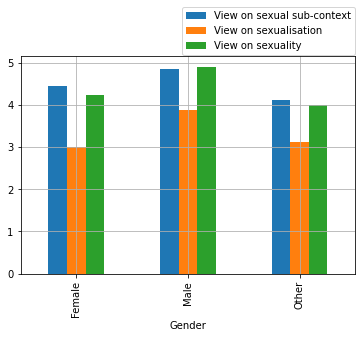

In [14]:
data.pivot_table(
    values = [
        'View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'
    ],
    index = 'Gender',
    aggfunc = 'mean'
).plot(kind = 'bar', grid = True)

#moves the legend from the way of the graph and edits the legend text
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

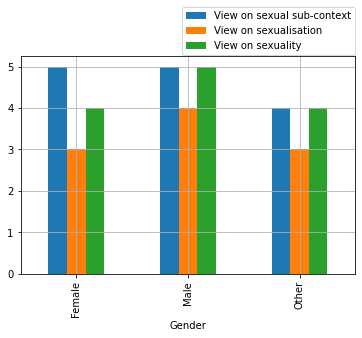

In [15]:
data.pivot_table(
    values = [
        'View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'],
    index = 'Gender',
    aggfunc = 'median').plot(kind = 'bar', grid = True)

#moves the legend from the way of the graph and edits the legend text
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

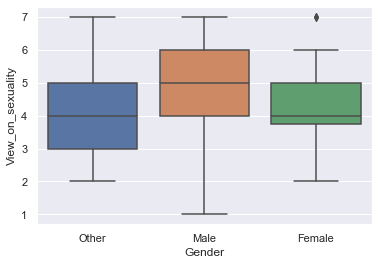

In [16]:
sns.set()
sns.boxplot(x = 'Gender',
            y = 'View_on_sexuality',
            data = data)

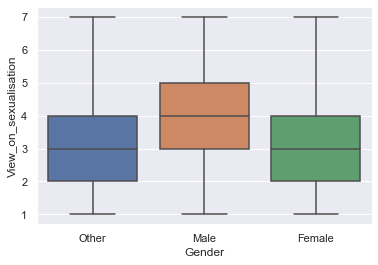

In [17]:
sns.set()
sns.boxplot(x = 'Gender',
            y = 'View_on_sexualisation',
            data = data)

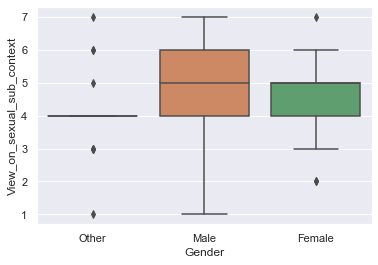

In [18]:
sns.set()
sns.boxplot(x = 'Gender',
            y = 'View_on_sexual_sub_context',
            data = data)

# Grouping data by Age Group

In [19]:
'''Groups the data by arbitrary Age groups used in a survey,
 showing mean, median, standard deviation,
 maximal and minimal values'''
data.groupby('Age_group')[
    'View_on_sexuality', 'View_on_sexualisation',
    'View_on_sexual_sub_context'
].agg([
    'mean','median','std','max','min'
])

View_on_sexuality                           \
                                  mean median       std max min   
Age_group                                                         
16-20                         4.518519    4.0  1.484176   7   1   
21-26                         4.914894    5.0  1.283975   7   2   
27-35                         4.695652    4.5  1.443292   7   1   
More than 35                  5.142857    5.5  1.167321   7   3   
Prefer not to answer          5.333333    6.0  1.154701   6   4   
Younger than 16               4.111111    4.0  0.781736   6   3   

                     View_on_sexualisation                           \
                                      mean median       std max min   
Age_group                                                             
16-20                             3.419753    3.0  1.413013   7   1   
21-26                             3.925532    4.0  1.468225   7   1   
27-35                             3.630435    4.0  1.525468   7   1   
More than 35                      3.928571    3.5  1.774360   7   2   
Prefer not to answer              4.333333    4.0  1.527525   6   3   
Younger than 16                   3.000000    3.0  0.866025   4   2   

                     View_on_sexual_sub_context                           
                                           mean median       std max min  
Age_group                                                                 
16-20                                  4.469136      4  1.162824   7   2  
21-26                                  4.882979      5  1.162648   7   2  
27-35                                  4.869565      5  1.343440   7   1  
More than 35                           4.928571      5  1.206666   7   3  
Prefer not to answer                   4.666667      4  1.154701   6   4  
Younger than 16                        4.555556      4  0.726483   6   4

In [20]:
'''Graphs below represent the data, shown in the table above. 
First two graphs create a pivot table to show mean and median value of people\'s views on
sexuality, sexual themes or sexualisation in games depnding on their Age groups, and display this
data as a bar graph.
The latter three graphs show boxplot of the same things.'''

"Graphs below represent the data, shown in the table above. \nFirst two graphs create a pivot table to show mean and median value of people's views on\nsexuality, sexual themes or sexualisation in games depnding on their Age groups, and display this\ndata as a bar graph.\nThe latter three graphs show boxplot of the same things."

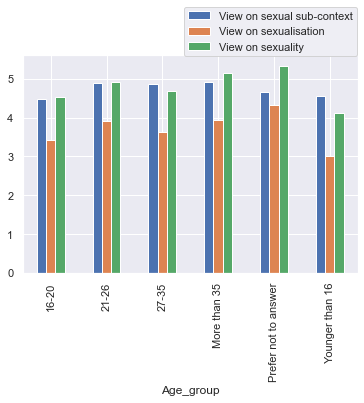

In [21]:
data.pivot_table(
    values = [
        'View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'],
    index = 'Age_group',
    aggfunc = 'mean'
).plot(kind = 'bar',grid = True)
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

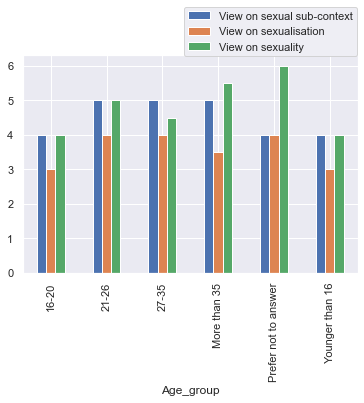

In [22]:
data.pivot_table(
    values =
    ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'],
    index = 'Age_group',
    aggfunc = 'median'
).plot(kind = 'bar', grid = True)
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

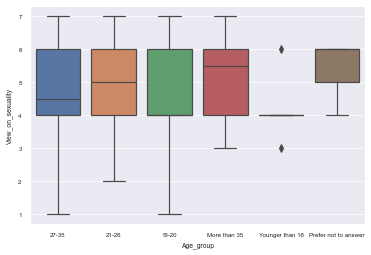

In [23]:
sns.set()
sns.set_context('paper', font_scale = 0.7)
sns.boxplot(x = 'Age_group',
            y = 'View_on_sexuality',
            data = data)

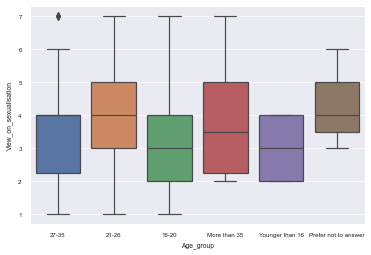

In [24]:
sns.set()
sns.set_context('paper', font_scale = 0.7)
#context must be in paper, notebook, talk, poster
sns.boxplot(x = 'Age_group',
            y = 'View_on_sexualisation',
            data = data)

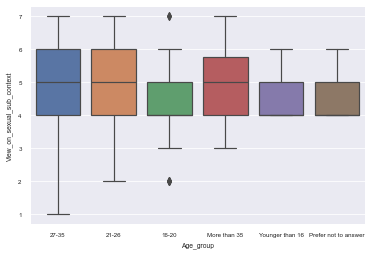

In [25]:
sns.set()
sns.set_context('paper', font_scale = 0.7)
sns.boxplot(x = 'Age_group',
            y = 'View_on_sexual_sub_context',
            data = data)

# Grouping data by Country

In [26]:
'''Groups the data by Country,
 showing mean, median, standard deviation,
 maximal and minimal values'''
data.groupby('Country')[
    'View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'
].agg(
    ['mean','median','std','max','min']
)

View_on_sexuality                           \
                                       mean median       std max min   
Country                                                                
Australia and New Zealand          4.777778    5.0  1.715938   7   1   
Brazil                             4.750000    4.5  0.886405   6   4   
Canada                             5.153846    5.0  0.898717   7   4   
France                             4.750000    4.5  1.164965   6   3   
Germany                            5.200000    6.0  1.698739   7   2   
Latvia                             5.250000    5.0  1.258306   7   4   
Mexico                             4.500000    4.0  1.000000   6   4   
Other                              4.916667    5.0  1.500000   7   1   
Poland                             4.833333    5.0  1.329160   6   3   
Russia                             4.666667    4.5  0.816497   6   4   
The Netherlands                    3.666667    4.0  1.505545   6   2   
UK                                 4.500000    4.0  1.000000   6   3   
USA                                4.642857    5.0  1.432299   7   1   

                          View_on_sexualisation                           \
                                           mean median       std max min   
Country                                                                    
Australia and New Zealand              3.000000    3.0  1.500000   5   1   
Brazil                                 3.125000    3.5  1.457738   5   1   
Canada                                 4.153846    5.0  1.573010   6   2   
France                                 3.625000    3.5  1.685018   6   1   
Germany                                3.866667    4.0  1.407463   6   1   
Latvia                                 4.500000    4.0  1.000000   6   4   
Mexico                                 3.500000    3.5  1.290994   5   2   
Other                                  3.944444    4.0  1.452966   7   1   
Poland                                 3.666667    3.5  1.861899   7   2   
Russia                                 3.833333    3.5  1.722401   7   2   
The Netherlands                        3.833333    3.5  1.722401   7   2   
UK                                     3.700000    4.0  1.128576   6   2   
USA                                    3.562500    3.0  1.511406   7   1   

                          View_on_sexual_sub_context                           
                                                mean median       std max min  
Country                                                                        
Australia and New Zealand                   4.888889    5.0  1.536591   7   3  
Brazil                                      4.750000    5.0  1.035098   6   3  
Canada                                      4.846154    5.0  0.987096   7   3  
France                                      4.625000    4.5  1.302470   6   3  
Germany                                     4.933333    5.0  1.222799   6   2  
Latvia                                      4.250000    4.0  1.258306   6   3  
Mexico                                      4.500000    4.0  1.000000   6   4  
Other                                       5.166667    5.0  1.108409   7   3  
Poland                                      4.666667    4.5  1.751190   7   2  
Russia                                      4.666667    4.5  0.816497   6   4  
The Netherlands                             3.833333    3.5  1.722401   7   2  
UK                                          4.450000    4.0  0.998683   6   3  
USA                                         4.678571    5.0  1.202207   7   1

In [27]:
'''Graphs below represent the data, shown in the table above. 
First two graphs create a pivot table to show mean and median value of people\'s views on
sexuality, sexual themes or sexualisation in games depnding on their mentioned Country, and display this
data as a bar graph.
The latter three graphs show boxplot of the same things.'''

"Graphs below represent the data, shown in the table above. \nFirst two graphs create a pivot table to show mean and median value of people's views on\nsexuality, sexual themes or sexualisation in games depnding on their mentioned Country, and display this\ndata as a bar graph.\nThe latter three graphs show boxplot of the same things."

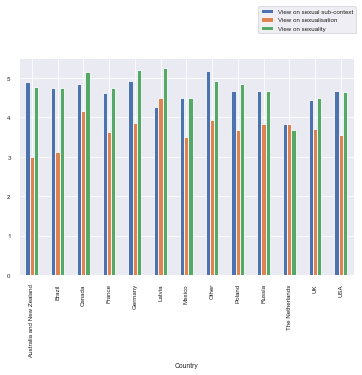

In [28]:
data.pivot_table(
    values =
    ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'],
    index = 'Country',
    aggfunc = 'mean'
).plot(kind = 'bar', grid = True)
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

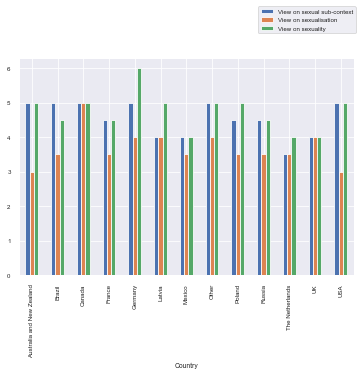

In [29]:
data.pivot_table(
    values =
    ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'],
    index = 'Country',
    aggfunc = 'median'
).plot(kind = 'bar', grid = True)
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

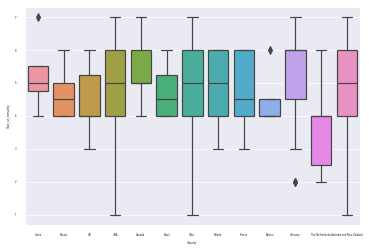

In [30]:
sns.set()
sns.set_context('paper', font_scale = 0.3)
sns.boxplot(x = 'Country',y = 'View_on_sexuality',data = data)

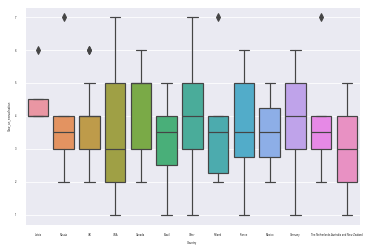

In [31]:
sns.set()
sns.set_context('paper', font_scale = 0.3)
sns.boxplot(x = 'Country',y = 'View_on_sexualisation',data = data)

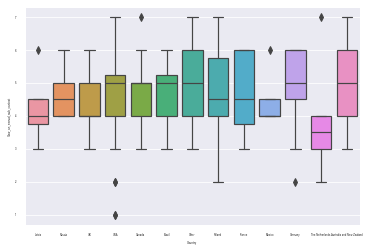

In [32]:
sns.set()
sns.set_context('paper', font_scale = 0.3)
sns.boxplot(x = 'Country',y = 'View_on_sexual_sub_context',data = data)

# Grouping data by Favourite Genre

In [33]:
'''Groups the data by Genre from the exploded dataframe,
 showing mean, median, standard deviation,
 maximal and minimal values'''
genres_exploded.groupby('Genre')[
    'View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'
].agg(
    ['mean','median','std','max','min']
)

View_on_sexuality                           \
                               mean median       std max min   
Genre                                                          
Action                     5.097561      5  1.319183   7   1   
Adventure                  4.785714      5  1.449320   7   2   
Multiplayer RPGs           4.866667      5  1.195778   7   2   
None                       3.833333      4  0.983192   5   2   
Simulators                 4.173913      4  1.466355   7   1   
Singleplayer RPGs          4.966667      5  1.425687   7   1   
Strategy                   4.613636      4  1.279824   7   2   

                  View_on_sexualisation                           \
                                   mean median       std max min   
Genre                                                              
Action                         4.048780    4.0  1.395550   7   2   
Adventure                      4.214286    4.0  1.257780   7   2   
Multiplayer RPGs               3.700000    4.0  1.441981   6   1   
None                           3.333333    3.5  1.211060   5   2   
Simulators                     3.217391    3.0  1.126399   5   1   
Singleplayer RPGs              3.577778    3.0  1.528587   7   1   
Strategy                       3.795455    4.0  1.578630   7   1   

                  View_on_sexual_sub_context                           
                                        mean median       std max min  
Genre                                                                  
Action                              4.902439      5  1.135889   7   3  
Adventure                           4.892857      5  1.165532   7   2  
Multiplayer RPGs                    4.800000      5  1.242911   7   2  
None                                3.666667      4  0.816497   4   2  
Simulators                          4.782609      5  1.166055   7   2  
Singleplayer RPGs                   4.888889      5  1.184587   7   1  
Strategy                            4.409091      4  1.187497   7   2

In [34]:
'''Graphs below represent the data, shown in the table above. 
First two graphs create a pivot table to show mean and median value of people\'s views on
sexuality, sexual themes or sexualisation in games depnding on Genre, and display this
data as a bar graph.
This particular segment uses dataframe exploded by Genre.
The latter three graphs show boxplot of the same things.'''

"Graphs below represent the data, shown in the table above. \nFirst two graphs create a pivot table to show mean and median value of people's views on\nsexuality, sexual themes or sexualisation in games depnding on Genre, and display this\ndata as a bar graph.\nThis particular segment uses dataframe exploded by Genre.\nThe latter three graphs show boxplot of the same things."

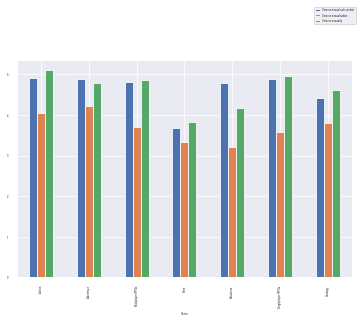

In [35]:
genres_exploded.pivot_table(
    values =
    ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'],
    index = 'Genre',
    aggfunc = 'mean'
).plot(kind = 'bar', grid = True)
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

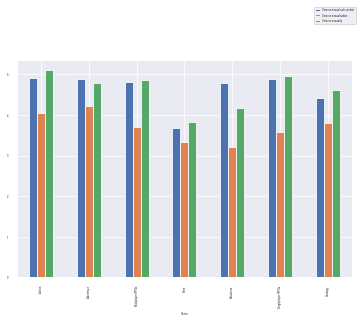

In [36]:
genres_exploded.pivot_table(
    values =
    ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'],
    index = 'Genre',
    aggfunc = 'mean'
).plot(kind = 'bar', grid = True)
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

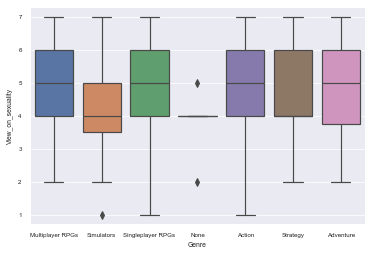

In [37]:
sns.set()
sns.set_context('paper', font_scale = 0.7)
sns.boxplot(x = 'Genre',y = 'View_on_sexuality',data = genres_exploded)

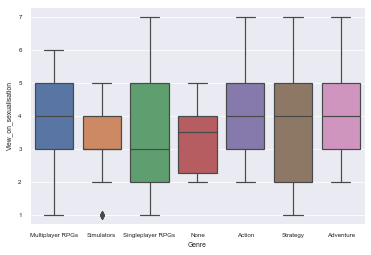

In [38]:
sns.set()
sns.set_context('paper', font_scale = 0.7)
sns.boxplot(x = 'Genre',y = 'View_on_sexualisation',data = genres_exploded)

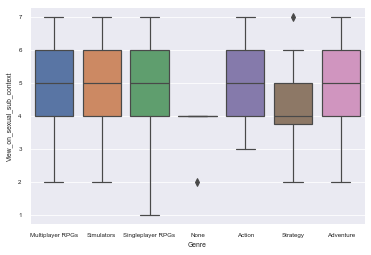

In [39]:
sns.set()
sns.set_context('paper', font_scale = 0.7)
sns.boxplot(x = 'Genre',y = 'View_on_sexual_sub_context',data = genres_exploded)

# Grouping data by Sexual Orientation

In [40]:
'''Groups the data by Sexual orientation,
 showing mean, median, standard deviation,
 maximal and minimal values'''
data.groupby('Sexual_orientation')[
    'View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'
].agg(
    ['mean','median','std','max','min']
)

View_on_sexuality                           \
                                mean median       std max min   
Sexual_orientation                                              
Asexual                     3.285714      4  0.913874   4   2   
Bisexual                    4.530612      4  1.459196   7   2   
Heterosexual                4.902597      5  1.332203   7   1   
Homosexual                  4.529412      5  0.874475   6   3   
Other                       5.307692      5  1.436698   7   3   

                   View_on_sexualisation                           \
                                    mean median       std max min   
Sexual_orientation                                                  
Asexual                         2.357143      2  0.928783   4   1   
Bisexual                        3.183673      3  1.453064   6   1   
Heterosexual                    3.928571      4  1.446687   7   1   
Homosexual                      3.058824      3  0.826936   4   1   
Other                           4.769231      5  1.363442   7   2   

                   View_on_sexual_sub_context                           
                                         mean median       std max min  
Sexual_orientation                                                      
Asexual                              3.571429      4  1.222500   6   1  
Bisexual                             4.816327      5  1.130514   7   2  
Heterosexual                         4.805195      5  1.183094   7   1  
Homosexual                           4.470588      4  0.874475   6   3  
Other                                5.153846      5  1.281025   7   3

In [41]:
'''Graphs below represent the data, shown in the table above. 
First two graphs create a pivot table to show mean and median value of people\'s views on
sexuality, sexual themes or sexualisation in games depnding on Genre, and display this
data as a bar graph.
The latter three graphs show boxplot of the same things.'''

"Graphs below represent the data, shown in the table above. \nFirst two graphs create a pivot table to show mean and median value of people's views on\nsexuality, sexual themes or sexualisation in games depnding on Genre, and display this\ndata as a bar graph.\nThe latter three graphs show boxplot of the same things."

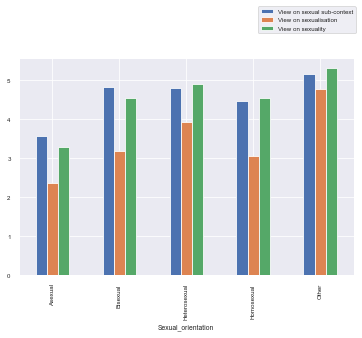

In [42]:
data.pivot_table(values =
                 ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'],
                 index = 'Sexual_orientation',
                 aggfunc = 'mean'
                ).plot(kind = 'bar', grid = True)
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

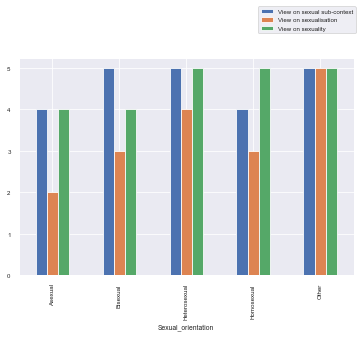

In [43]:
data.pivot_table(values =
                 ['View_on_sexuality', 'View_on_sexualisation', 'View_on_sexual_sub_context'],
                 index = 'Sexual_orientation',
                 aggfunc = 'median'
                ).plot(kind = 'bar', grid = True)
plt.legend(
    ['View on sexual sub-context','View on sexualisation','View on sexuality'],
    loc = 'upper right',
    bbox_to_anchor = (1.015,1.25))

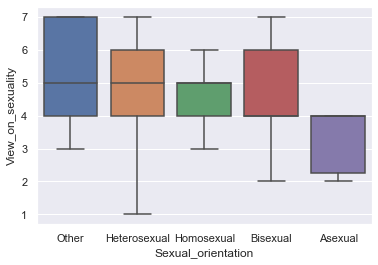

In [44]:
sns.set()
sns.set_context('notebook', font_scale = 1)
sns.boxplot(x = 'Sexual_orientation',y = 'View_on_sexuality',data = data)

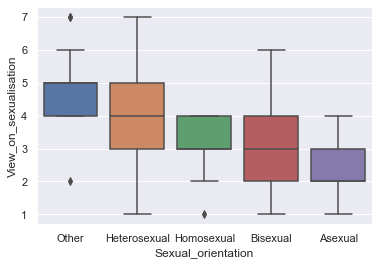

In [45]:
sns.set()
sns.set_context('notebook', font_scale = 1)
sns.boxplot(x = 'Sexual_orientation',y = 'View_on_sexualisation',data = data)

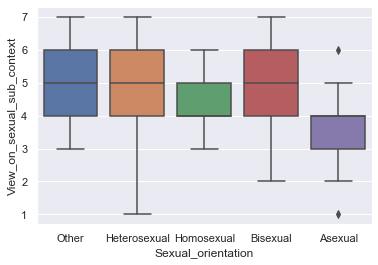

In [46]:
sns.set()
sns.set_context('notebook', font_scale = 1)
sns.boxplot(x = 'Sexual_orientation',y = 'View_on_sexual_sub_context',data = data)